### **Importing Libraries and loading the main dataset**

In [119]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras
from google.colab import files
import io

In [120]:
#printing the versions of the library used and that of python
print ('Python: {}'.format(sys.version))
print ('Pandas: {}'.format(pd.__version__))
print ('Sklearn: {}'.format(sklearn.__version__))
print ('Keras: {}'.format(keras.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Pandas: 1.5.3
Sklearn: 1.2.2
Keras: 2.14.0


In [121]:
#uploading the file from the pc
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [122]:
print(uploaded.keys())

dict_keys(['dataset.csv'])


In [123]:
#to ensure the file has been uploaded
print(uploaded)

{'dataset.csv': b"A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD\r\nb'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26,b'f',b'White-European',b'no',b'no',b'United States',b'no',6,b'18 and more',b'Self',b'NO'\r\nb'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5,b'18 and more',b'Self',b'NO'\r\nb'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8,b'18 and more',b'Parent',b'YES'\r\nb'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6,b'18 and more',b'Self',b'NO'\r\nb'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40,b'f',b'?',b'no',b'no',b'Egypt',b'no',2,b'18 and more',b'?',b'NO'\r\nb'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',36,b'm',b'Others',b'yes',b'no',b'United States',b'no',9,b'18

In [124]:
#reading the csv file into data
import io

data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [125]:
#prints first few rows to get an idea of the data
print('Shape of DataFrame: {}'.format(data.shape))
data.head()

Shape of DataFrame: (704, 21)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2,b'18 and more',b'?',b'NO'


In [126]:
#data visualizing
print(data.loc[0])

A1_Score                        b'1'
A2_Score                        b'1'
A3_Score                        b'1'
A4_Score                        b'1'
A5_Score                        b'0'
A6_Score                        b'0'
A7_Score                        b'1'
A8_Score                        b'1'
A9_Score                        b'0'
A10_Score                       b'0'
age                             26.0
gender                          b'f'
ethnicity          b'White-European'
jundice                        b'no'
austim                         b'no'
contry_of_res       b'United States'
used_app_before                b'no'
result                             6
age_desc              b'18 and more'
relation                     b'Self'
Class/ASD                      b'NO'
Name: 0, dtype: object


### **Data Preprocessing**

In [127]:
print(data.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [128]:
# drop unwanted columns
data = data.drop(['ethnicity','contry_of_res','used_app_before','age_desc','relation','austim', 'result'], axis=1)

In [129]:
#one-hot encoding
Preprocessed_dataset= pd.get_dummies(data)

In [130]:
#saving that file
Preprocessed_dataset.to_csv('preprocessed_dataset_final.csv', index=False)

In [131]:
#visualise the data
print('Shape of DataFrame: {}'.format(Preprocessed_dataset.shape))
Preprocessed_dataset.head()

Shape of DataFrame: (704, 27)


,age,A1_Score_b'0',A1_Score_b'1',A2_Score_b'0',A2_Score_b'1',A3_Score_b'0',A3_Score_b'1',A4_Score_b'0',A4_Score_b'1',A5_Score_b'0',...,A9_Score_b'0',A9_Score_b'1',A10_Score_b'0',A10_Score_b'1',gender_b'f',gender_b'm',jundice_b'no',jundice_b'yes',Class/ASD_b'NO',Class/ASD_b'YES'
0,26.0,0,1,0,1,0,1,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1,24.0,0,1,0,1,1,0,0,1,1,...,1,0,0,1,0,1,1,0,1,0
2,27.0,0,1,0,1,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
3,35.0,0,1,0,1,1,0,0,1,1,...,1,0,0,1,1,0,1,0,1,0
4,40.0,0,1,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [132]:
#renaming the columns and dropping some more columns

new_column_names = [
    'age', 'A1_Score_0', 'A1_Score_1', 'A2_Score_0', 'A2_Score_1', 'A3_Score_0', 'A3_Score_1',
    'A4_Score_0', 'A4_Score_1', 'A5_Score_0', 'A5_Score_1', 'A6_Score_0', 'A6_Score_1',
    'A7_Score_0', 'A7_Score_1', 'A8_Score_0', 'A8_Score_1', 'A9_Score_0', 'A9_Score_1',
    'A10_Score_0', 'A10_Score_1', 'gender_f', 'gender_m', 'jaundice_no', 'jaundice_yes', 'Class/ASD_NO', 'Class/ASD_YES'
]

Preprocessed_dataset.columns = new_column_names

In [133]:
#checking the range of age
age_range = Preprocessed_dataset['age'].min(), Preprocessed_dataset['age'].max()

print("Age Range:", age_range)

Age Range: (17.0, 383.0)


In [134]:
#select a range of 'age' only until 55
New_data = Preprocessed_dataset[Preprocessed_dataset['age'] <= 55]

In [135]:
#saving that file
New_data.to_csv('New_data.csv', index=False)

In [153]:
#checking for missing values and removing them
import numpy as np
feature_names = [
    'age', 'A1_Score_0', 'A1_Score_1', 'A2_Score_0', 'A2_Score_1', 'A3_Score_0', 'A3_Score_1',
    'A4_Score_0', 'A4_Score_1', 'A5_Score_0', 'A5_Score_1', 'A6_Score_0', 'A6_Score_1',
    'A7_Score_0', 'A7_Score_1', 'A8_Score_0', 'A8_Score_1', 'A9_Score_0', 'A9_Score_1',
    'A10_Score_0', 'A10_Score_1', 'gender_f', 'gender_m', 'jaundice_no', 'jaundice_yes', 'Class/ASD_NO', 'Class/ASD_YES'
]
nan_indices = np.isnan(New_data)

nan_sum_per_feature = np.sum(nan_indices, axis=0)

rows_with_nan = np.where(np.any(nan_indices, axis=1))[0]

print("Indices of rows with NaN values:")
print(rows_with_nan)

print("Number of NaN values per feature:")
for feature_name, nan_count in zip(feature_names, nan_sum_per_feature):
    print(f"{feature_name}: {nan_count}")

Indices of rows with NaN values:
[]
Number of NaN values per feature:
age: 0
A1_Score_0: 0
A1_Score_1: 0
A2_Score_0: 0
A2_Score_1: 0
A3_Score_0: 0
A3_Score_1: 0
A4_Score_0: 0
A4_Score_1: 0
A5_Score_0: 0
A5_Score_1: 0
A6_Score_0: 0
A6_Score_1: 0
A7_Score_0: 0
A7_Score_1: 0
A8_Score_0: 0
A8_Score_1: 0
A9_Score_0: 0
A9_Score_1: 0
A10_Score_0: 0
A10_Score_1: 0
gender_f: 0
gender_m: 0
jaundice_no: 0
jaundice_yes: 0
Class/ASD_NO: 0
Class/ASD_YES: 0


In [154]:
print(New_data.columns)

Index(['age', 'A1_Score_0', 'A1_Score_1', 'A2_Score_0', 'A2_Score_1',
       'A3_Score_0', 'A3_Score_1', 'A4_Score_0', 'A4_Score_1', 'A5_Score_0',
       'A5_Score_1', 'A6_Score_0', 'A6_Score_1', 'A7_Score_0', 'A7_Score_1',
       'A8_Score_0', 'A8_Score_1', 'A9_Score_0', 'A9_Score_1', 'A10_Score_0',
       'A10_Score_1', 'gender_f', 'gender_m', 'jaundice_no', 'jaundice_yes',
       'Class/ASD_NO', 'Class/ASD_YES'],
      dtype='object')


In [155]:
#splitting the dataset into features and output
X_columns_to_exclude = ['Class/ASD_YES',  'Class/ASD_NO']
X = New_data.drop(columns=X_columns_to_exclude)

Y = New_data[X_columns_to_exclude]

# Display the columns of X and y
print("Columns of X:")
print(X.columns)

print("\nColumns of Y:")
print(Y.columns)

Columns of X:
Index(['age', 'A1_Score_0', 'A1_Score_1', 'A2_Score_0', 'A2_Score_1',
       'A3_Score_0', 'A3_Score_1', 'A4_Score_0', 'A4_Score_1', 'A5_Score_0',
       'A5_Score_1', 'A6_Score_0', 'A6_Score_1', 'A7_Score_0', 'A7_Score_1',
       'A8_Score_0', 'A8_Score_1', 'A9_Score_0', 'A9_Score_1', 'A10_Score_0',
       'A10_Score_1', 'gender_f', 'gender_m', 'jaundice_no', 'jaundice_yes'],
      dtype='object')

Columns of Y:
Index(['Class/ASD_YES', 'Class/ASD_NO'], dtype='object')


In [156]:
#how x looks like- just the features
print('Shape of DataFrame: {}'.format(X.shape))
X.head()

Shape of DataFrame: (692, 25)


,age,A1_Score_0,A1_Score_1,A2_Score_0,A2_Score_1,A3_Score_0,A3_Score_1,A4_Score_0,A4_Score_1,A5_Score_0,...,A8_Score_0,A8_Score_1,A9_Score_0,A9_Score_1,A10_Score_0,A10_Score_1,gender_f,gender_m,jaundice_no,jaundice_yes
0,26.0,0,1,0,1,0,1,0,1,1,...,0,1,1,0,1,0,1,0,1,0
1,24.0,0,1,0,1,1,0,0,1,1,...,0,1,1,0,0,1,0,1,1,0
2,27.0,0,1,0,1,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
3,35.0,0,1,0,1,1,0,0,1,1,...,0,1,1,0,0,1,1,0,1,0
4,40.0,0,1,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0


In [157]:
#how Y looks like- Target variable
print('Shape of DataFrame: {}'.format(Y.shape))
Y.head()

Shape of DataFrame: (692, 2)


,Class/ASD_YES,Class/ASD_NO
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [158]:
#To check for class imbalance
class_counts = Y['Class/ASD_YES'].value_counts()

# Print the counts
print("Class/ASD_b'NO' count:", class_counts[0])
print("Class/ASD_b'YES' count:", class_counts[1])

Class/ASD_b'NO' count: 508
Class/ASD_b'YES' count: 184


In [159]:
#check if index is continuous and reset the index
X = X.reset_index(drop=True)

# Check if the indices are now continuous
if list(X.index) == list(range(len(X))):
    print("Indices in X are now continuous.")
else:
    print("Indices in X are still not continuous.")


Y = Y.reset_index(drop=True)

# Check if the indices are now continuous
if list(Y.index) == list(range(len(Y))):
    print("Indices in Y are now continuous.")
else:
    print("Indices in Y are still not continuous.")

Indices in X are now continuous.
Indices in Y are now continuous.


### **splitting into training and test dataset**

In [160]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(553, 25)
(139, 25)
(553, 2)
(139, 2)


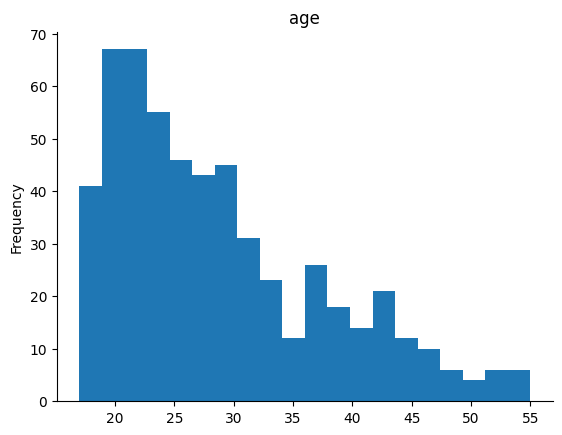

In [161]:
from matplotlib import pyplot as plt
X_train['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **The Model- SVM**

In [162]:
#importing libraries
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Handling class imbalance using RandomOverSampler and RandomUnderSampler
oversample = RandomOverSampler(sampling_strategy=0.5)  # Adjust the sampling_strategy as needed
undersample = RandomUnderSampler(sampling_strategy=0.8)  # Adjust the sampling_strategy as needed

# Create a pipeline with oversampling and undersampling
pipeline = Pipeline([
    ('oversample', oversample),
    ('undersample', undersample),
    ('classifier', SVC(kernel='linear', C=0.01, random_state=10))
])

pipeline.fit(X_train, Y_train['Class/ASD_YES'])

# Fit the oversampler and undersampler separately
X_train_oversampled, Y_train_oversampled = oversample.fit_resample(X_train, Y_train['Class/ASD_YES'])
X_train_resampled, Y_train_resampled = undersample.fit_resample(X_train_oversampled, Y_train_oversampled)

# Train the model on the resampled data
svm_model1 = SVC(kernel='linear', C=0.01, random_state=10)
svm_model1.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the testing set
svm_predictions2 = svm_model1.predict(X_test)
# Calculate confusion matrix
cm = confusion_matrix(Y_test['Class/ASD_YES'], svm_predictions2)

# Extract TP, TN, FP, FN from confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Calculate evaluation metrics
accuracy = accuracy_score(Y_test['Class/ASD_YES'], svm_predictions2)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Print metrics
print('\nResults for SVM Model after handling class imbalance:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('\nClassification Report:')
print(classification_report(Y_test['Class/ASD_YES'], svm_predictions2))


Results for SVM Model after handling class imbalance:
Accuracy: 0.9568345323741008
Precision: 0.8723404255319149
Recall: 1.0
F1 Score: 0.9318181818181819

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        98
           1       0.87      1.00      0.93        41

    accuracy                           0.96       139
   macro avg       0.94      0.97      0.95       139
weighted avg       0.96      0.96      0.96       139



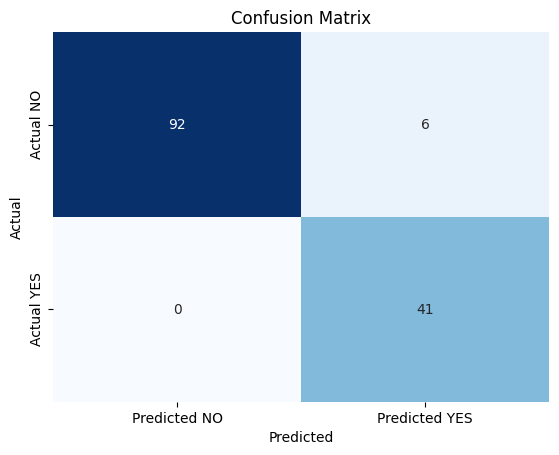

In [198]:
#quick evaluation on svm handling class imbalance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
conf_matrix = confusion_matrix(Y_test['Class/ASD_YES'], svm_predictions2)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted NO', 'Predicted YES'],
            yticklabels=['Actual NO', 'Actual YES'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Evaluation Metric**

In [199]:
from sklearn.metrics import hinge_loss

# Get the decision function values for the testing set
svm_decision_values = pipeline.decision_function(X_test)

# Calculate hinge loss
svm_hinge_loss = hinge_loss(Y_test['Class/ASD_YES'], svm_decision_values)

print("Hinge Loss:", svm_hinge_loss)

Hinge Loss: 0.2089597482678141


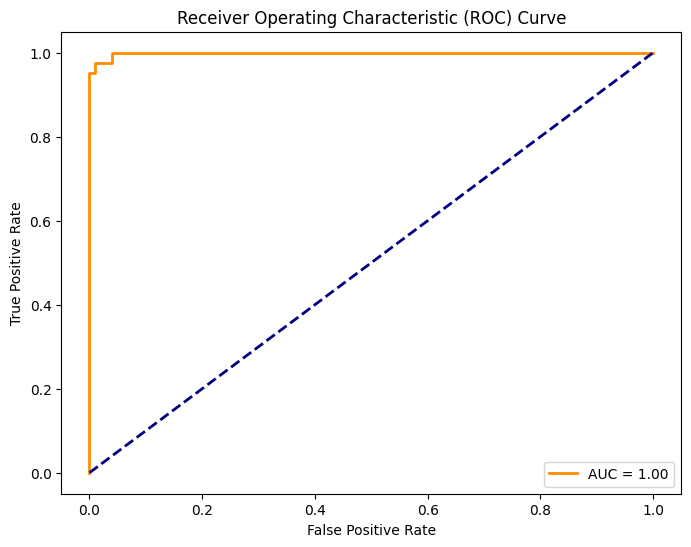

AUC: 1.00


In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
svm_probs = pipeline.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test['Class/ASD_YES'], svm_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')


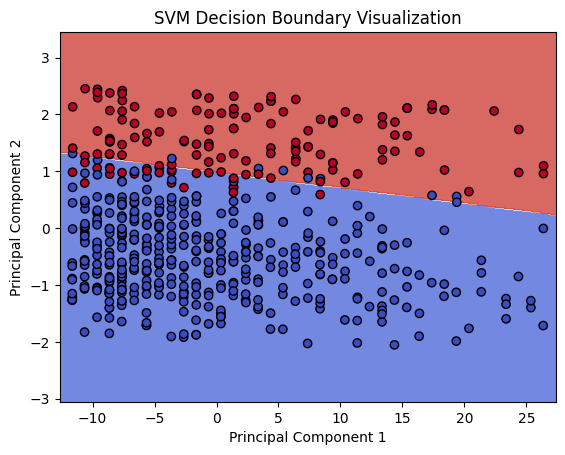

In [206]:
#c=0.01
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train SVM model on the reduced data
svm_model = SVC(kernel='linear', C=0.01, random_state=10)
svm_model.fit(X_pca, Y_train['Class/ASD_YES'])

# Visualize decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Use the 'Class/ASD_b'YES'' column for color-coding
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train['Class/ASD_YES'], cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('SVM Decision Boundary Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### **KNN Model**

In [210]:
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline with oversampling, undersampling, and KNN classifier
knn_pipeline = Pipeline([
    ('oversample', oversample),
    ('undersample', undersample),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # You can adjust the number of neighbors (n_neighbors) as needed
])

# Fit the pipeline on the training data
knn_pipeline.fit(X_train, Y_train['Class/ASD_YES'])

# Fit the oversampler and undersampler separately
X_train_oversampled_knn, Y_train_oversampled_knn = oversample.fit_resample(X_train, Y_train['Class/ASD_YES'])
X_train_resampled_knn, Y_train_resampled_knn = undersample.fit_resample(X_train_oversampled_knn, Y_train_oversampled_knn)

# Train the KNN model on the resampled data
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train_resampled_knn, Y_train_resampled_knn)

# Make predictions on the testing set
knn_predictions = knn_model.predict(X_test)

# Evaluate the KNN model
print('\nResults for KNN Model after handling class imbalance:')
print('Accuracy:', accuracy_score(Y_test['Class/ASD_YES'], knn_predictions))
print('Classification Report:')
print(classification_report(Y_test['Class/ASD_YES'], knn_predictions))


Results for KNN Model after handling class imbalance:
Accuracy: 0.8848920863309353
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        98
           1       0.72      1.00      0.84        41

    accuracy                           0.88       139
   macro avg       0.86      0.92      0.87       139
weighted avg       0.92      0.88      0.89       139



In [212]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(Y_test['Class/ASD_YES'], knn_predictions)
print('Cohen\'s Kappa:', kappa)

Cohen's Kappa: 0.751452838623156


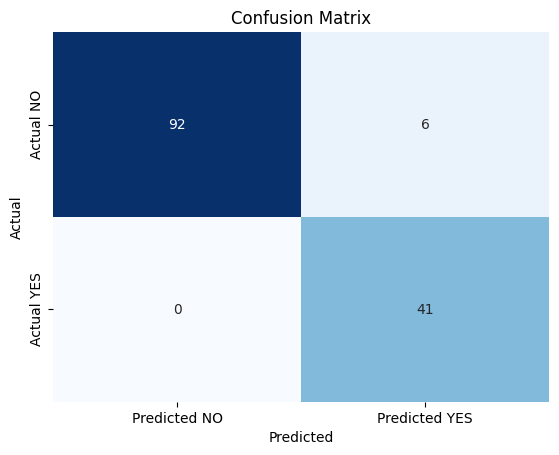

In [215]:
#quick evaluation on svm handling class imbalance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
conf_matrix_knn = confusion_matrix(Y_test['Class/ASD_YES'], knn_predictions)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted NO', 'Predicted YES'],
            yticklabels=['Actual NO', 'Actual YES'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

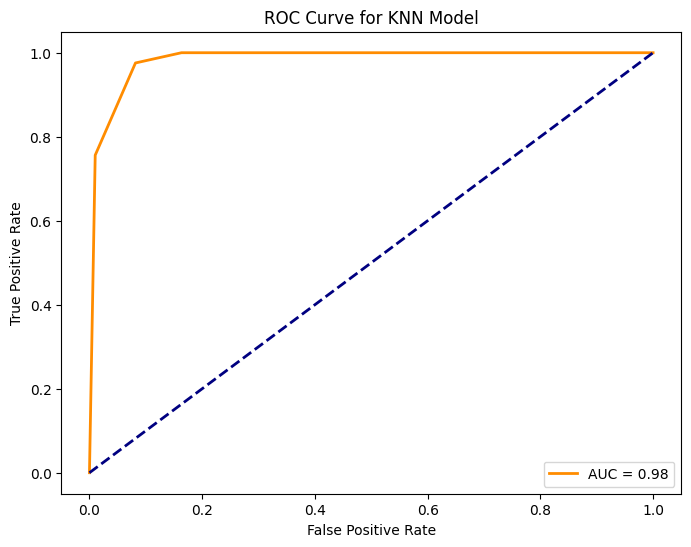


AUC: 0.98


In [216]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve and AUC
knn_probs = knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test['Class/ASD_YES'], knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc='lower right')
plt.show()

print(f'\nAUC: {roc_auc_knn:.2f}')

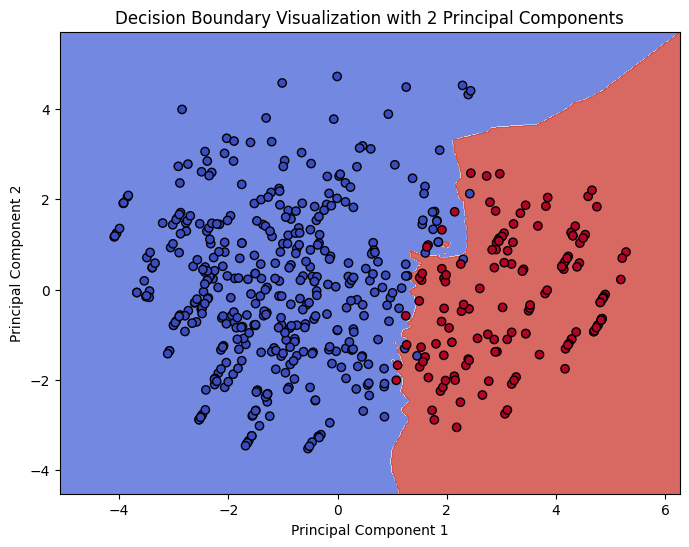

In [218]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_scaled is your feature matrix with 28 features
# Standardize the features before applying PCA if not already done

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train your model on the reduced data
knn_model.fit(X_train_pca, Y_train['Class/ASD_YES'])

# Visualize decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train['Class/ASD_YES'], cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('Decision Boundary Visualization with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
